In [1]:
%matplotlib inline
from pylab import*
import math
import numpy as np

In [2]:
def my_pdf(x, mu, sd):
    """Normal distribution density """
    return 1 / (sd * math.sqrt(2 * math.pi)) * math.exp( - (x - mu)**2 / (2 * sd**2)) 

def my_cdf(x, mu, sd):
    """Cumulative density function for normal distribution """
    return (1.0 + math.erf((x - mu) / (sd * math.sqrt(2.0)))) / 2.0

def phi(x):
    """Cumulative density function for the standard normal distribution """
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

def beta_two_tail(m1, s1, n1, m2, s2, n2):
    """ beta-error two-tailed for alpha = 0.05"""
    z025 = 1.96
    z = (m1 - m2) / math.sqrt(s1**2  / n1 + s2**2 / n2)
    return phi(z025 - z) - phi(-z025 - z)

def power(m1, s1, n1, m2, s2, n2):
    """Statistical power (1 - beta error)"""
    return 1 - beta_two_tail(m1, s1, n1, m2, s2, n2)

def sd_pooled(m1, s1, n1, m2, s2, n2):
    """ Pooled standard deviation"""
    return math.sqrt(((n2 - 1) * s2 ** 2 + (n1 - 1) * s1 ** 2) / (n1 + n2 - 2))

def hedges_biased(m1, s1, n1, m2, s2, n2):
    """Biased effect size"""
    return (m2 - m1) / sd_pooled(m1, s1, n1, m2, s2, n2)

def hedges_unbiased(m1, s1, n1, m2, s2, n2):
    """"""
    correction = 1.0 - 3.0 / (4 * (n1 + n2 - 2) - 1)
    return correction * hedges_biased(m1, s1, n1, m2, s2, n2)


In [3]:
mu1, sd1 = 0.0, 1.0 # mean and SD of first sample
mu2, sd2 = 1.0, 1.0 # mean and SD of second sample
ns1, ns2 = 16, 16    #number of obs per sample

In [4]:
xmin = mu1 - 4 * sd1
xmax = mu1 + 4 * sd1
increase = (xmax - xmin) / 100
x = np.arange(xmin, xmax, increase)
pdf1 = [my_pdf(x1, mu1, sd1) for x1 in x]
cdf1 = [my_cdf(x1, mu1, sd1) for x1 in x]
pdf2 = [my_pdf(x1, mu2, sd2) for x1 in x]
cdf2 = [my_cdf(x1, mu2, sd2) for x1 in x]

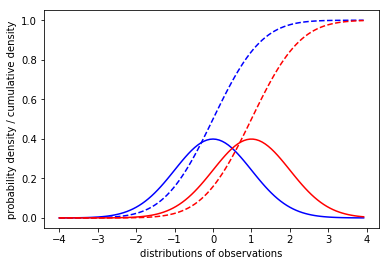

In [5]:
plot(x, pdf1, 'b-')
plot(x, cdf1, 'b--')
plot(x, pdf2, 'r-')
plot(x, cdf2, 'r--')
xlabel('distributions of observations')
ylabel('probability density / cumulative density');

In [6]:
print('effect size (Hedges biased) =', hedges_biased(mu1, sd1, ns1, mu2, sd2, ns2))

effect size (Hedges biased) = 1.0


In [7]:
print('effect size (Hedges un-biased) =', hedges_unbiased(mu1, sd1, ns1, mu2, sd2, ns2))

effect size (Hedges un-biased) = 0.9747899159663865


In [8]:
print('statistical power =', power(mu1, sd1, ns1, mu2, sd2, ns2))

statistical power = 0.8074205649484903
